# Multivariate Linear Regression Tutorial
<br>
In the previous tutorial, we predicted restaurant profits (our **label**) using linear regression based on a sole **feature**, which was the population of cities that restaurants were located in. However at often times, there are more than one features that affect the label, for example size of the restaurant in square feet, number of competitors within its vicinity, etc. In this situation, we use **Mutivariate Linear Regression** which occurs when we want to perform linear regression when our data set has more than one feature. 

Note that since the dataset is multivariate, we are dealing with **multi-dimensional** data, which cannot be represented on a 2D graph. The best we can do for visualization is to use a 3D graph, but that is only in the special case that there are two features and one label (ie. predicting restaurant profits based on only two factors, like population of city and size of restaurant). However in practice, often times there are more than two features that determine a label, which makes it difficult to depict our data in a graph.

For this tutorial, we will use the dataset "ex1data2.txt" found in this directory to predict housing prices. The dataset comes with three columns: Size of house (in square feet), number of bedrooms, and price. 

In [88]:
# Once again, the first step is to import libraries and load our DataFrame. 
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True) # Don't print in scientific notation

# although our data is 3D, we are not going visualize our dataset/prediction
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('ex1data2.txt', names = ['Size of house (sq ft)',
                                          'Number of bedrooms',
                                          'Price of house'])
print(df.head(5))
print('\n')
print(df.tail(5))

   Size of house (sq ft)  Number of bedrooms  Price of house
0                   2104                   3          399900
1                   1600                   3          329900
2                   2400                   3          369000
3                   1416                   2          232000
4                   3000                   4          539900


    Size of house (sq ft)  Number of bedrooms  Price of house
42                   2567                   4          314000
43                   1200                   3          299000
44                    852                   2          179900
45                   1852                   4          299900
46                   1203                   3          239500


With multivariate linear regression, we need to introduce some new notation:
- m is the number of data points (47 in this example)
- n is the number of features (2 in this example)
- $x^{(i)}_j$ is the value at the j-th feature on the i-th training example ($x^{(43)}_1$ = 1200, 1st feature on 43rd data point)
- $y^{(i)}$ is the i-th label ($y^{(4)}$ = 539900)

<br>
Recall the equation of a line for SLRM:
$$ y = \theta_0x_0 + \theta_1x_1 = \theta_0 + \theta_1x_1 $$

For multivariate linear regression, our new equation (which we will call the **hypothesis function**) is: 
<br>
<br>
\begin{align*}
h(x) & = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n &&& \text{note: }x_0 = 1 \\\\
    & = \left [  \theta_0~\theta_1~...~\theta_n\right ]\begin{bmatrix}
x_0\\ 
x_1\\ 
...\\
x_n 
\end{bmatrix} \\
 & = \theta^Tx
\end{align*}
<br>
<br>
Similarly, recall the gradient descent algorithm for SLRM that for each iteration we set:
$$ \theta_0 = \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)} - y^{(i)}) \\ \theta_1 = \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)} - y^{(i)})~ x^{(i)} $$

However for multiple variables, for each iteration in the gradient descent algorithm, we set:
\begin{align*}
\theta_0 &= \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1 + \theta_2x^{(i)}_2 + ... + \theta_nx^{(i)}_n - y^{(i)}) = \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m} (\theta^Tx^{(i)} - y^{(i)}) \\
\theta_1 &= \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})~ x^{(i)}_1 \\
\theta_2 &= \theta_2 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})~ x^{(i)}_2 \\ 
& =~... \\
\theta_n &= \theta_n - \alpha\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})~ x^{(i)}_n \\
\end{align*}
<br>
The last thing to note about multivariate linear regression is the concept of **feature scaling**. For this dataset, notice that the size of house (sq ft) varies greatly vs the number of bedrooms as shown below. The values of house sizes are also much larger than values for the number of bedrooms column. 

In [89]:
print(df.head(5))
print('\n')
print(df.tail(5))

   Size of house (sq ft)  Number of bedrooms  Price of house
0                   2104                   3          399900
1                   1600                   3          329900
2                   2400                   3          369000
3                   1416                   2          232000
4                   3000                   4          539900


    Size of house (sq ft)  Number of bedrooms  Price of house
42                   2567                   4          314000
43                   1200                   3          299000
44                    852                   2          179900
45                   1852                   4          299900
46                   1203                   3          239500


This can cause a problem when modelling the regression. Because the house size column has higher values and variance than the number of bedrooms column, the algorithm may weigh house size as a heavier factor vs number of bedrooms in determining house price. Thus, we need to scale every feature proportionally to avoid this bias.

Another advantage of using feature scaling is that gradient descent will converge faster. Smaller ranges converge faster vs. larger rangers, therefore a mix of small and large ranges without feature scaling passed into the gradient descent algorithm will cause inefficient oscillation towards finding the minimum.

To do feature scaling, we will try to restrict every value in our DataFrame between [-1, 1] as much as possible. The technique to do this is called **standardization**, which is to adjust input values $x^{(i)}$ such that:
$$ x^{(i)} := \frac{x^{(i)} - \mu_i}{s_i} $$
where $\mu_i$ and $s_i$ are the mean and standard deviation of all data points for feature i respectively.

In [90]:
def standardize(df):
    for column in df.columns:
        columnMean = df[column].mean()
        columnStd = df[column].std()
        df[column] = df[column].apply(lambda x: (x-columnMean)/columnStd)
    return df

scaled_df = standardize(df.copy()) # keep original df, make copy to modify

print(scaled_df.head())
print("\nCompared to old df: \n")
print(df.head())

   Size of house (sq ft)  Number of bedrooms  Price of house
0               0.130010           -0.223675        0.475747
1              -0.504190           -0.223675       -0.084074
2               0.502476           -0.223675        0.228626
3              -0.735723           -1.537767       -0.867025
4               1.257476            1.090417        1.595389

Compared to old df: 

   Size of house (sq ft)  Number of bedrooms  Price of house
0                   2104                   3          399900
1                   1600                   3          329900
2                   2400                   3          369000
3                   1416                   2          232000
4                   3000                   4          539900


In [91]:
X_matrix = scaled_df.as_matrix(df.columns[:-1])
X_matrix = np.insert(X_matrix, 0, 1, axis=1) # remember to insert column of 1's for X_0
X_matrix = np.matrix(X_matrix)
y = scaled_df[scaled_df.columns[-1:]].as_matrix()

Recall the methods for ```computeCost(...)``` and ```gradientDescent(...)``` from the last tutorial. One advantage of using **vectorization** is that we don't need to add extra code to these methods as long as X, y, and theta matrix dimensions align properly for matrix operations. Thus, we can keep our code from before:

In [92]:
def computeCost(X, y, theta):
    m = len(y)
    cost = np.sum(np.square(X*theta - y))/(2*m)
    return cost

numCols = scaled_df.shape[1]
theta = np.matrix(np.zeros((numCols,1))) 
# first initialize theta to be zeros

iterations = 1500
alpha = 0.01

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1)) 
    # keep track of the value of each error as we iterate
    
    for i in range(num_iters):  
        
        error = X*theta - y
        theta = theta - (alpha/m) * (X.T * error)
        
        J_history[[i]] = computeCost(X,y,theta)
        # To see value of cost at each iteration
    
    return (theta, J_history)

result = gradientDescent(X_matrix,y,theta,alpha,iterations)
theta = result[0]
J_history = result[1]

print('theta: ')
print(theta)
print('\n J_history:')
print(J_history)

theta: 
[[-0.        ]
 [ 0.88404235]
 [-0.05245518]]

 J_history:
[[ 0.4805491 ]
 [ 0.47198588]
 [ 0.46366462]
 ..., 
 [ 0.13068671]
 [ 0.13068671]
 [ 0.13068671]]


The gradient descent algorithm returned the optimal $(\theta_0,\theta_1,\theta_2)$  values (0, 0.884, -0.052) that gave a final mininmal cost of around 0.1307. Looks promising! Let's plot a similar graph of iterations to cost from last tutorial to make sure we converged to a minimum.

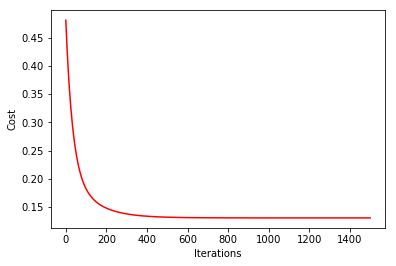

In [93]:
plt.plot(np.arange(iterations), J_history, 'r')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Looks good! Similarly to the last tutorial, multivariate linear regression can be done using scikit-learn.

In [94]:
from sklearn import linear_model

numXCols = df.shape[1] - 1 # = 2
numRows = df.shape[0]

regr = linear_model.LinearRegression()

X_data = np.reshape(df[df.columns[:-1]], (numRows, numXCols)) 
y_data = np.reshape(df[df.columns[-1]], (numRows, 1))

regr.fit(X_data, y_data)
prediction = regr.predict(X_data) # gives array of predictions for every entry in X_data

# although can't visualize in a plot, we can still make our custom predictions
print(regr.predict([[3000, 4]]))
# house with 3000 sq ft and 4 bedrooms is predicted to be $472277.86

[[ 472277.85514636]]


/Users/eddiewang/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


Congratulations for finishing the second tutorial! In the next post, we will examine Logistic Regression which is used for binary classification problems. See you until then :)
